# Modules and packages

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# Datasets

In [116]:
data = pd.read_excel(r"C:\Users\HP-PC\Desktop\data\Escherichia coli.xlsx")

In [117]:
data

,PROTEIN,LENGTH,MOL-WEIGHT,pH,Tm
0,6-phosphogluconate dehydrogenase,468.0,51481.0,7.6,57.83
1,Fumarate reductase flavoprotein subunit,602.0,51481.0,7.6,46.77
2,NADP-specific glutamate dehydrogenase,447.0,51481.0,7.6,58.78
3,Superoxide dismutase [Mn],206.0,51481.0,7.6,66.59
4,Ribonucleoside-diphosphate reductase 1 subunit...,761.0,51481.0,7.6,44.79
...,...,...,...,...,...
32575,Phosphoserine aminotransferase,370.0,40423.0,7.6,59.34
32576,Coatomer subunit gamma-1,874.0,97718.0,7.6,51.49
32577,Peptidyl-prolyl cis-trans isomerase FKBP7,222.0,25794.0,7.6,59.19
32578,Transforming acidic coiled-coil-containing pro...,838.0,90360.0,7.6,58.85


In [118]:
data.dropna(inplace = True)

In [119]:
data.shape

(29213, 5)

In [120]:
data.describe()

,LENGTH,MOL-WEIGHT,pH,Tm
count,29213.000000,2.921300e+04,29213.000000,29213.000000
mean,594.920104,6.717023e+04,8.131311,51.873140
std,670.819324,7.328340e+04,1.028596,7.858510
min,0.000000,1.089000e+03,6.800000,0.000000
25%,269.000000,3.353500e+04,7.400000,48.477564
50%,436.000000,5.148100e+04,7.600000,50.860000
75%,718.000000,7.872900e+04,8.500000,53.861120
max,34350.000000,3.816030e+06,10.000000,90.990000


# Dependent and independent variables

In [121]:
x = data[["LENGTH", "MOL-WEIGHT", "pH"]]
y = data["Tm"]


# Data splitting

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

# Random Forest regressor

In [170]:
np.random.seed(1000)
model = RandomForestRegressor(n_estimators=50)
model.fit(x_train, y_train)
#r2 = model.score(x_test, y_test)
#r2

RandomForestRegressor(n_estimators=50)

In [171]:
predictions = model.predict(x_test)

In [172]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mae = mean_absolute_error(y_test.values.ravel(), predictions)
mse = mean_squared_error(y_test.values.ravel(), predictions)
r2 = r2_score(y_test.values.ravel(), predictions)

# Evaluation metrics for random forest regressor

In [158]:
import math

In [173]:
# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Root Mean Squared Error:', math.sqrt(round(mse, 2)))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 3.3
Root Mean Squared Error: 5.662155066756826
R-squared scores: 0.46


# Testing model with inputs from user

In [174]:
LENGTH = float(input('Enter gene length: '))
MOLWEIGHT = float(input('Enter molecular weight: '))
pH = float(input('Enter pH value: '))


Enter gene length: 468
Enter molecular weight: 51481
Enter pH value: 7.6


In [175]:
testing = model.predict([[LENGTH, MOLWEIGHT, pH]])
testing

C:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([55.77001])

# KNN Regressor

In [188]:
from sklearn.model_selection import cross_val_predict

In [189]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train, y_train)
y_pred = cross_val_predict(knn, x, y, cv=5)


# Knn evaluation metrics

In [192]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(sqrt(mean_squared_error(y, y_pred)))
print(r2_score(y, y_pred))

8.232622909278776
-0.09751603323323277


# Testing knn with inputs from user

In [193]:
LENGTH = int(input('Enter gene length: '))
MOLWEIGHT = int(input('Enter molecular weight: '))
pH = (input('Enter pH value: '))


Enter gene length: 468
Enter molecular weight: 51481
Enter pH value: 7.6


In [194]:
testing = knn.predict([[LENGTH, MOLWEIGHT, pH]])
testing

C:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([50.897])

In [195]:
error = []
for k in range(1, 51):
    knn = KNeighborsRegressor(n_neighbors=k)
    y_pred = cross_val_predict(knn, x, y, cv=5)
    error.append(sqrt(mean_squared_error(y, y_pred)))
    

Text(0, 0.5, 'Root mean squared error')

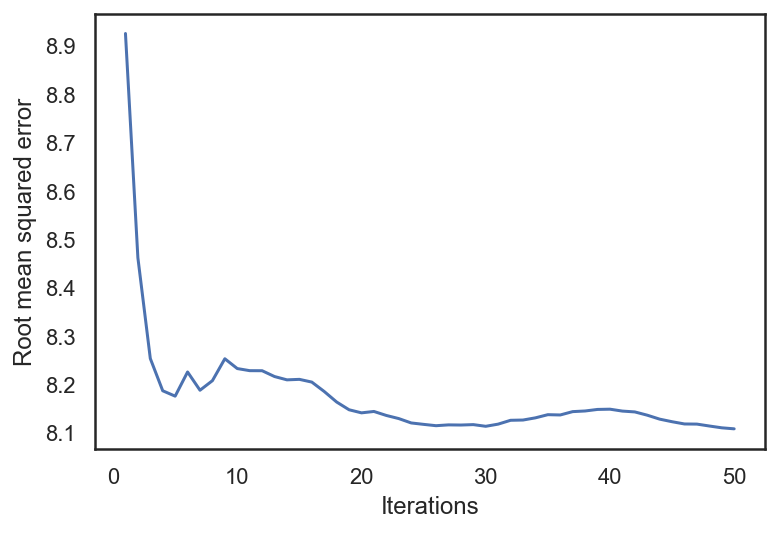

In [196]:
plt.plot(range(1, 51), error)
plt.xlabel("Iterations")
plt.ylabel("Root mean squared error")

# scaling

In [197]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))



In [198]:
y_pred = cross_val_predict(pipeline, x, y, cv=5)
print(sqrt(mean_squared_error(y, y_pred)))
print(r2_score(y, y_pred))

10.29665681559478
-0.7168284563139362


In [199]:
error = []
for k in range(1, 51):
    pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k))
    y_pred = cross_val_predict(pipeline, x, y, cv=5)
    error.append(sqrt(mean_squared_error(y, y_pred)))
    

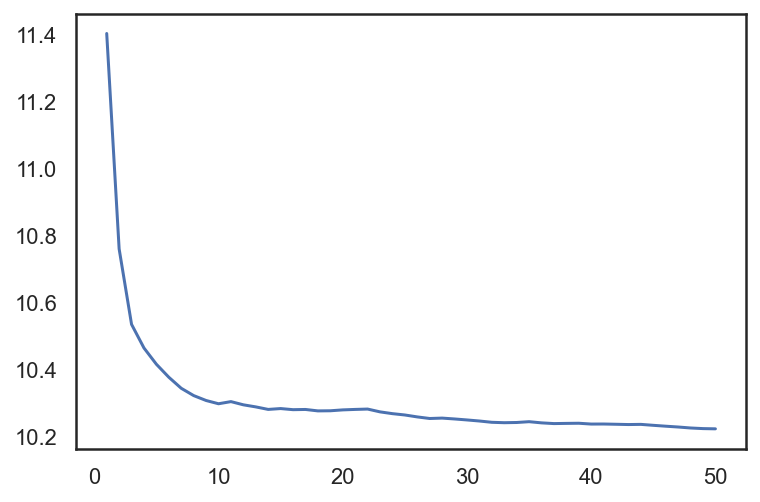

In [200]:
plt.plot(range(1, 51), error)

# Linear regression

In [208]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [209]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [210]:
y_pred = model.predict(x_test)

# Evaluation metrics

In [213]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Root Mean squared error (RMSE): %.2f'
      % math.sqrt(mean_squared_error(y_test, y_pred)))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [ 1.86074974e-02 -1.79258187e-04  7.57395772e-01]
Intercept: 46.74598889333077
Root Mean squared error (RMSE): 7.43
Coefficient of determination (R^2): 0.06


# Testing with user inputs

In [205]:
LENGTH = int(input('Enter gene length: '))
MOLWEIGHT = int(input('Enter molecular weight: '))
pH = (input('Enter pH value: '))


Enter gene length: 468
Enter molecular weight: 51481
Enter pH value: 7.6


In [212]:
testing = model.predict([[LENGTH, MOLWEIGHT, pH]])
testing

C:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([51.98211485])

# plots

In [62]:
y_test

6677     51.292669
32147    59.950000
26333    57.624670
32291    60.020000
4537     48.100000
           ...    
21265    44.760000
6461     51.972597
22950    51.020000
30844    53.326590
10432    50.138365
Name: Tm, Length: 5843, dtype: float64

In [63]:
np.array(y_test)

array([51.29266881, 59.95      , 57.62467   , ..., 51.02      ,
       53.32659   , 50.13836523])

In [64]:
y_pred

array([51.50165276, 52.17811683, 54.15325734, ..., 50.87920031,
       53.84885247, 52.20746535])

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tm'>

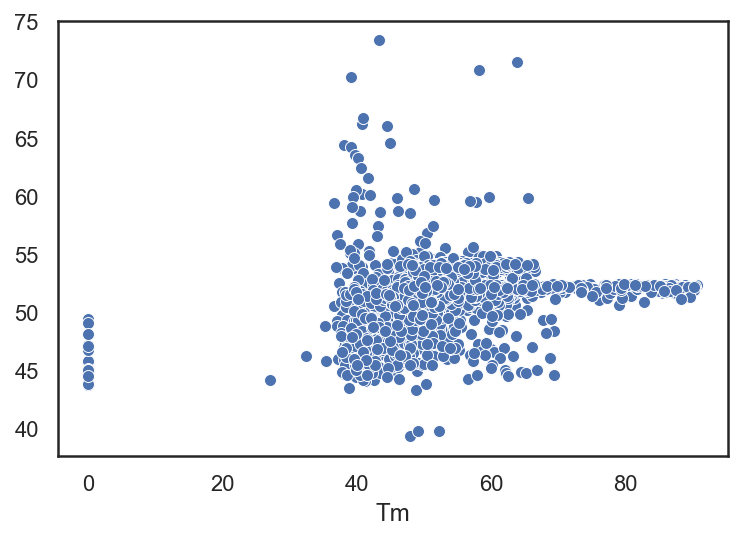

In [65]:
sns.scatterplot(y_test, y_pred)

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tm'>

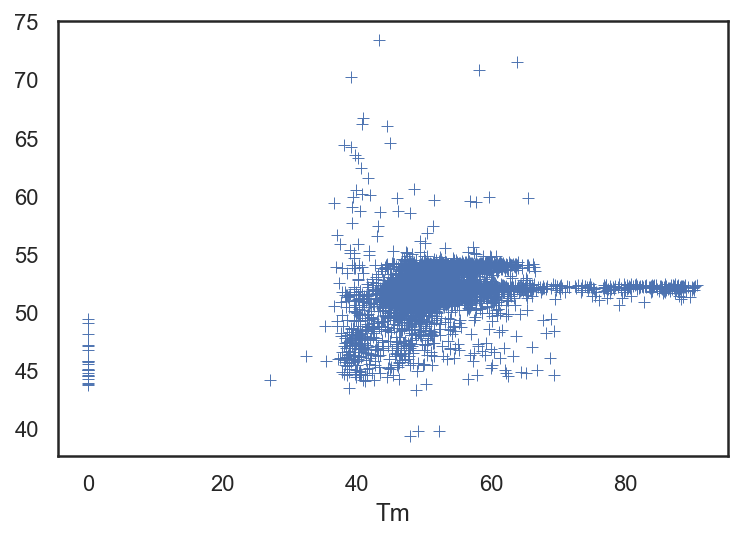

In [66]:
sns.scatterplot(y_test, y_pred, marker="+")

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tm'>

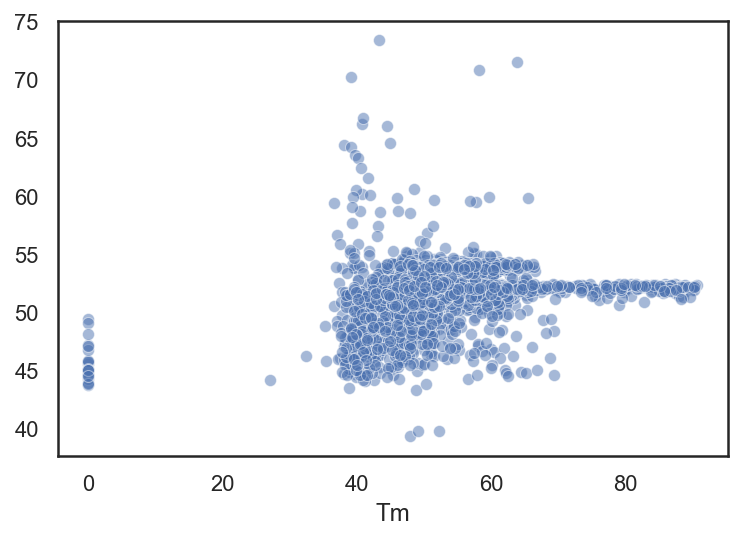

In [67]:
sns.scatterplot(y_test, y_pred, alpha=0.5)

# Neural Network regression

In [214]:
# Import all needed libraries and sublibraries

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam # - Works
from keras.callbacks import EarlyStopping

import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [215]:
# Split the data into input (x) training and testing data, and ouput (y) training and testing data, 
# with training data being 80% of the data, and testing data being the remaining 20% of the data

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [217]:
# Scale both training and testing input data

X_train = preprocessing.scale(X_train)

X_test = preprocessing.scale(X_test)

# Linear neural network

C:\anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


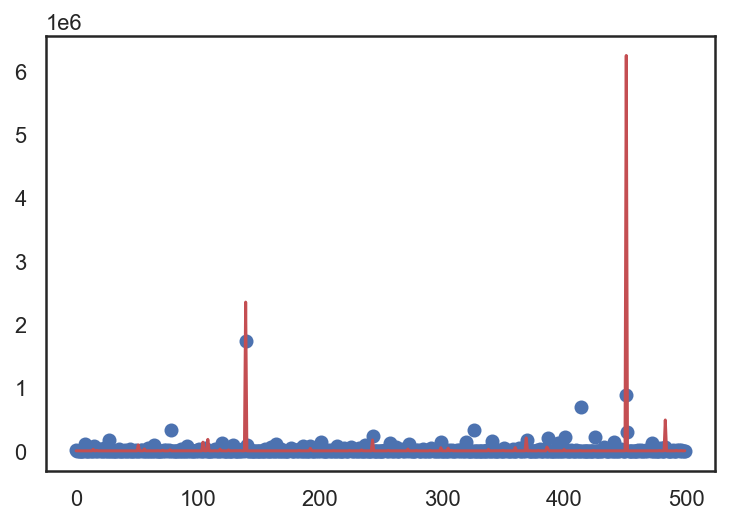

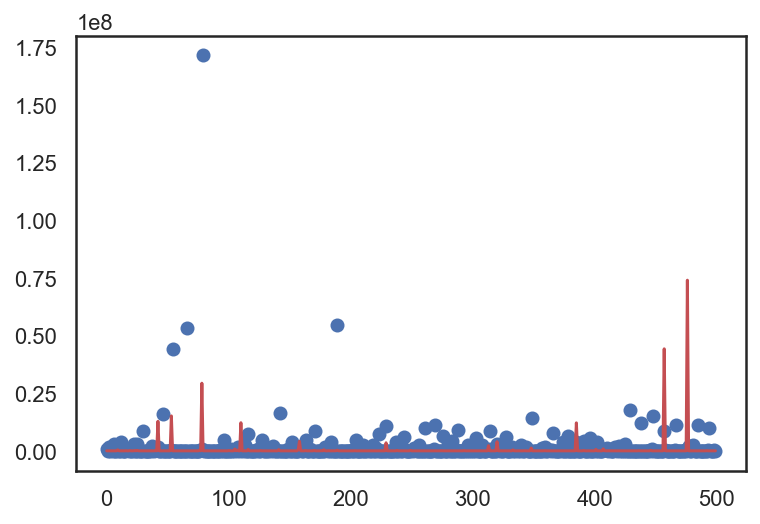

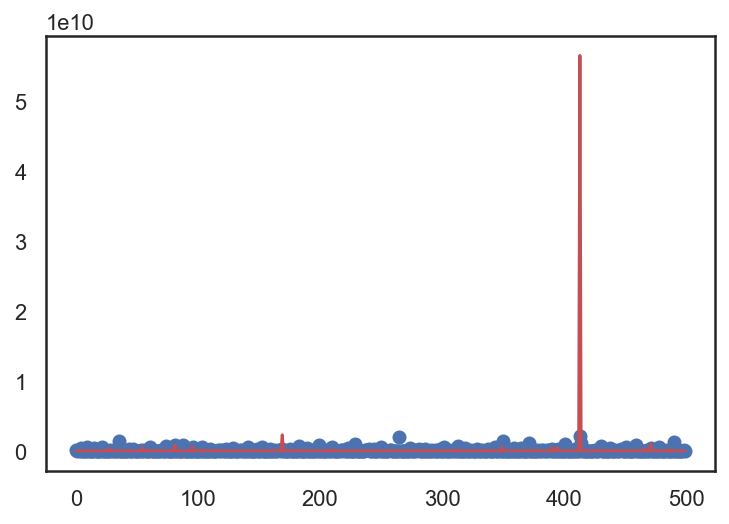

In [218]:
# Plots the results of a learning rate of 100, 1000, and 10000 respectively, with all other parameters constant

LR = [100,1000,10000]

for i in LR:
    #Defines linear regression model and its structure
    model = Sequential()
    model.add(Dense(1, input_shape=(3,)))
    
    #Compiles model
    model.compile(Adam(lr=i), 'mean_squared_error')
    
    #Fits model
    history = model.fit(X_train, y_train, epochs = 500, validation_split = 0.1,verbose = 0)
    history_dict=history.history
    
    #Plots model's training cost/loss and model's validation split cost/loss
    loss_values = history_dict['loss']
    val_loss_values=history_dict['val_loss']
    plt.figure()
    plt.plot(loss_values,'bo',label='training loss')
    plt.plot(val_loss_values,'r',label='val training loss')

# Linear neural network with relu activation function

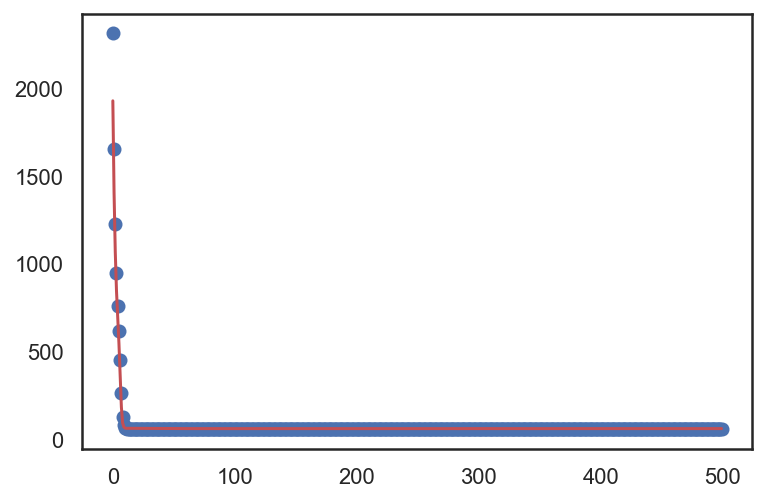

In [219]:
# Runs and plots the performance of a model with the same parameters from before (and a learning rate of 10000), 
# but now with an activation function (Relu)

model = Sequential()
model.add(Dense(1, input_shape=(3,), activation = 'relu'))
model.compile(Adam(lr=0.01), 'mean_squared_error')
history = model.fit(X_train, y_train, epochs = 500, validation_split = 0.1,verbose = 0)

history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')

# Evaluation metrics

In [220]:
# Runs model (the one with the activation function, although this doesn't really matter as they perform the same) 
# with its current weights on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.062
The R2 score on the Test set is:	0.044


In [221]:
from sklearn.metrics import mean_squared_error
import math
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)

In [222]:
math.sqrt(MSE_train)


7.703675376883389

In [223]:
math.sqrt(MSE_test)


7.303402117886871

# Testing model with user inputs

In [233]:
LENGTH = int(input('Enter gene length: '))
MOLWEIGHT = int(input('Enter molecular weight: '))
pH = float(input('Enter pH value: '))


Enter gene length: 468
Enter molecular weight: 51481
Enter pH value: 7.6


In [234]:
testing = model.predict([[LENGTH, MOLWEIGHT, pH]])
testing

array([[0.]], dtype=float32)

# Multi-layered neural network 

C:\anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


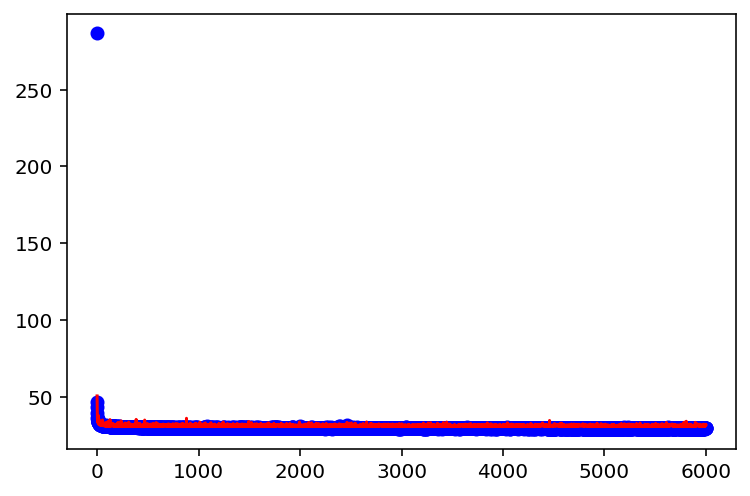

In [11]:
# Defines "deep" model and its structure
model = Sequential()
model.add(Dense(13, input_shape=(3,), activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(1,))
model.compile(Adam(lr=0.003), 'mean_squared_error')

# Runs model for 2000 iterations and assigns this to 'history'
history = model.fit(X_train, y_train, epochs = 6000, validation_split = 0.2, verbose = 0)

# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')

In [12]:
# Runs model (the one with the activation function, although this doesn't really matter as they perform the same) 
# with its current weights on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.512
The R2 score on the Test set is:	0.498


In [104]:
from sklearn.metrics import mean_squared_error
import math
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)

In [105]:
math.sqrt(MSE_train)


9.755347031654026

In [106]:
math.sqrt(MSE_test)


9.567423881905414

In [107]:
LENGTH = int(input('Enter gene length: '))
MOLWEIGHT = int(input('Enter molecular weight: '))
pH = (input('Enter pH value: '))


Enter gene length: 461
Enter molecular weight: 51481
Enter pH value: 8


In [108]:
testing = model.predict([[LENGTH, MOLWEIGHT, pH]])
testing

C:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([52.15482067])

# Multi-layered neural network with early stopping

C:\anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 42: early stopping
The R2 score on the Train set is:	0.491
The R2 score on the Test set is:	0.482


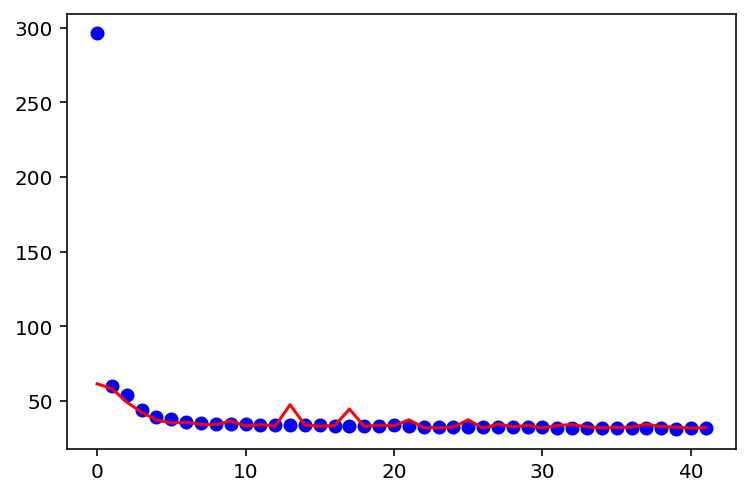

In [18]:
# Defines "deep" model and its structure
model = Sequential()
model.add(Dense(13, input_shape=(3,), activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(1,))
model.compile(Adam(lr=0.003), 'mean_squared_error')

# Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fits model over 2000 iterations with 'earlystopper' callback, and assigns it to history
history = model.fit(X_train, y_train, epochs = 2000, validation_split = 0.2,shuffle = True, verbose = 0, 
                    callbacks = [earlystopper])

# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')

# Runs model with its current weights on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

In [34]:
from sklearn.metrics import mean_squared_error
import math
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)

In [36]:
math.sqrt(MSE_train)


5.620105807342004

In [37]:
math.sqrt(MSE_test)

5.604109500940012

In [102]:
LENGTH = int(input('Enter gene length: '))
MOLWEIGHT = int(input('Enter molecular weight: '))
pH = (input('Enter pH value: '))


Enter gene length: 461
Enter molecular weight: 51481
Enter pH value: 8


In [103]:
testing = model.predict([[LENGTH, MOLWEIGHT, pH]])
testing

C:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([52.15482067])

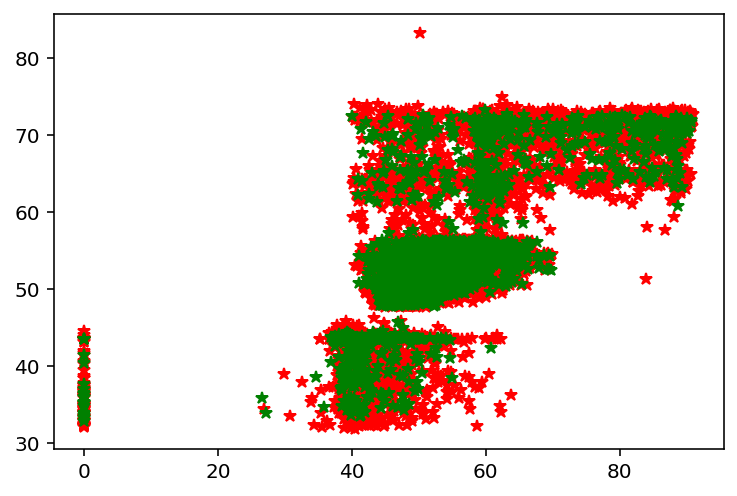

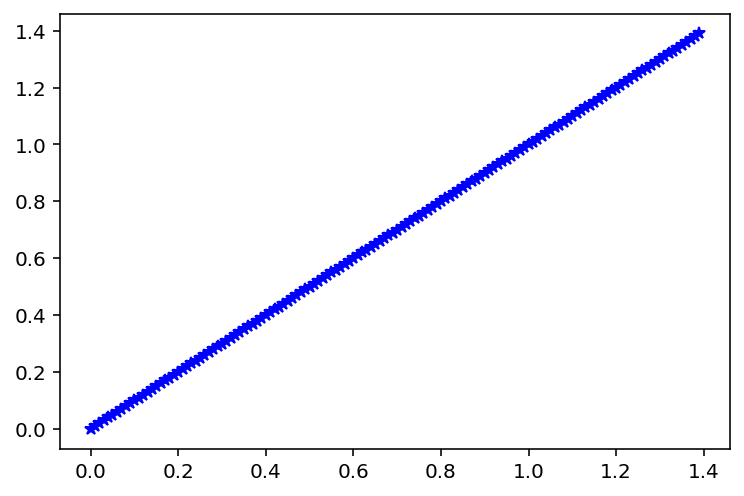

In [19]:
plt.plot(y_train, y_train_pred,'*r')
plt.plot(y_test, y_test_pred, '*g')
plt.figure()
for i in range(0,140):
    plt.plot(i/100,i/100,'*b')